# **Point in polygon problem**

Here we discuss the *ray-crossing* algorithm, our implementation in the `point_in_polygon` module and its features. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon # to plot polygons
import plotly.graph_objects as go # to plot maps
import plotly.io as pio # to display the maps as static images
from point_in_polygon import PolygonE, PolygonS

## 1 - Ray-crossing algorithm

Our aim is to determine whether a point in bi-dimensional space is inside or outside a given polygon. We will consider the both the Euclidean and 2-sphere cases. Here we will consider the ray-crossing algorithm, since it is an intuitive method that can easily implemented.

### 1.1 - Euclidean case

In this algorithm we consider a half line starting at the point we want to decide if it is inside or outside the polygon. For simplicity, we consider a horizontal line, i.e. with fixed $y$-coordinate oriented along the positive $y$-axis. We then count the number of times that half line crosses the sides of the polygon. A odd number of crosses indicates the point is inside the polygon, while a even number of crosses indicates the point is outside. See example in the Figure 1 below.

<div style="text-align: center;">
  <img src="ray_crossing.png" width="750" height="500"/><br>
  <em>Figure 1: Example of a Euclidean polygon with an internal and external points and the number of crossings for each half line starting at those points.</em>
</div>

<br><br>

Thus, for a given side of the polygon defined by the segment $\overline{\rm v_1v_2}$, the problem is whether the horizontal half line starting at the point $P$ crosses or not that particular side. A necessary condition for that crossing to happen is that $y_1 < y_P < y_2$. Next, we note that the equation for the segment corresponding to that side can be written as
$$
y(x) = y_1 + \frac{y_2 - y_1}{x_2 - x_1}(x - x_1),
$$
with $x_1 \le x \le x_2$. The $x$-coordinate of the intersect is then given by
$$
x_{\rm intersect} = \frac{(y_P - y_1)(x_2 - x_1)}{y_2 - y_1} + x_1.
$$
Depending on what side of the point $P$ if with respect to the segment a crossing can happen. In particular, a crossing will happen if $x_P < x_{\rm intersect}$.

<div style="text-align: center;">
  <img src="intersect.png" width="750" height="500"/><br>
  <em>Figure 2: Depiction of the point of interest P and a given side of the poligon bewteen the vertices $\rm v_1$ and $\rm v_2$.</em>
</div>
<br><br>

In conclusion, given a point $P = (x_P, y_P)$ and vertices ${\rm v_1} = (x_1, y_1)$ and ${\rm v_2} = (x_2, y_2)$, the necessary and sufficient conditions for the horizontal half line starting at $P$ and directed along the positive $y$-axis to cross the side $\overline{\rm v_1v_2}$ of the polygon are

- $y_1 < y_P < y_2$ and
- $x_P < x_{\rm intersect}$. 

### 1.2 - The 2-sphere case

The 2-sphere case is very similar to the Euclidean case. Here we assume that the sides of the polygon are short segments of the great circles joining two consecutive vertices. It is convenient to treat the problem in the embedding 3-d Euclidean space and describe the points on the 2-sphere as normalised radius vector sitting at the origin in the 3-d space.

As in the Euclidean space, here we consider the shorter great circle segment starting at the point of interest and count the number of times that great circle crosses the sides of the polygon. Again, the main problem here is to check whether two great circle segments intersect each other. 

Thus, let us consider the equation for the great circle segment between to vertices $\rm \vec{v}_1$ and $\rm \vec{v}_2$:
$$
\vec{r}_{12}(\gamma) = \frac{\sin\gamma}{\sin\gamma_{12}}{\rm\vec{v}_2} - \frac{\sin(\gamma-\gamma_{12})}{\sin\gamma_{12}}{\rm\vec{v}_1},
$$
where $\cos\gamma_{12} = {\rm \vec{v}}_1\cdot{\rm \vec{v}}_2$ and $0 \le \gamma \le \gamma_{12}$. That equation can be written in terms of the tangent vector at the ${\rm \vec{v}}_1$ as
$$
\vec{r}_{12}(\gamma) = \cos\gamma{\rm\vec{v}_1} + \sin\gamma{\rm\vec{t}},
$$
where the tangent vector is
$$
{\rm\vec{t}} = \frac{{\rm\vec{v}_2} - \cos\gamma_{12}{\rm\vec{v}_1}}{\sin\gamma_{12}}.
$$

For the great circle segment starting at $P$, we will consider the west-east segment. It is given by the following equation:
$$
\vec{r}(\alpha) = \cos\alpha \vec{r}_P + \sin\alpha \hat{\varphi}_P,
$$
where $\hat{\varphi}_P = \left(-\cos({\rm lat}_P)\sin({\rm lon}_P),\ \cos({\rm lat}_P)\sin({\rm lon}_P), 0\right)$ is the unit vector in the west-east longitude direction at the point $P$ and ${\rm lat}_P$ and ${\rm lon}_P$ are the latitude and longitude of the point $P$. We can easily see that this vector generates displacements in the west-east direction:
$$
\vec{r}(\alpha) = \left(\cos({\rm lat}_P)\cos(\alpha + {\rm lon}_P), \cos({\rm lat}_P)\sin(\alpha + {\rm lon}_P), \sin({\rm lat}_P)\right).
$$

Similarly to the Euclidean case, a necessary condition for the west-east great circle segment to intersect the side of the polygon defined by the vertices ${\rm \vec{v}}_1$ and ${\rm \vec{v}}_2$ is that ${\rm lat}_1 < {\rm lat}_P < {\rm lat}_2$. To obtain the longitude at which these great circles intersect, we impose that $\vec{r}(\alpha_{\rm intersect}) = \vec{r}_{12}(\gamma_{\rm intersect})$, and thus
$$
\cos\alpha_{\rm intersect} \vec{r}_P + \sin\alpha_{\rm intersect} \hat{\varphi}_P = \cos\gamma_{\rm intersect}{\rm\vec{v}_1} + \sin\gamma_{\rm intersect}{\rm\vec{t}}
$$
and take the scalar product of both sides of this equation with the vectors ${\rm \vec{v}}_1$, $\vec{r}_P$, ${\rm\vec{t}}$ and $\hat{\varphi}_P$. From the resulting four equation we obtain
$$
\tan\alpha_{\rm intersect} = \frac{1 - (\vec{r}_P\cdot {\rm \vec{v}}_1)^2 - (\vec{r}_P\cdot {\rm\vec{t}})^2}{(\hat{\varphi}_P\cdot {\rm \vec{v}}_1)(\vec{r}_P\cdot {\rm \vec{v}}_1)
 + (\hat{\varphi}_P\cdot {\rm\vec{t}})(\vec{r}_P\cdot {\rm\vec{t}})}.
$$

Again, Depending on what side of the point $P$ if with respect to the segment a crossing can happen. In particular, a crossing will happen if ${\rm lon}_P < \alpha_{\rm intersect}$.

In conclusion, given a point $\vec{r}_P$ and vertices ${\rm \vec{v}_1}$ and ${\rm \vec{v}_2}$, the necessary and sufficient conditions for the west-east great circle segment starting at $\vec{r}_P$ to cross the side of the polygon are

- ${\rm lat}_1 < {\rm lat}_P < {\rm lat}_2$ and
- ${\rm lon}_P < \alpha_{\rm intersect}$. 

### 1.3 - Creating polygons

To test the ray-crossing algorithm we have also, our `point_in_polygon` class also creates general enough polygons in Euclidean and the 2-sphere spaces. The idea is to choose a point, for now on the "anchor point", and launch the vertices from there.

- **Euclidean polygons**: The polygon is build by constructing the radius vectors connecting the anchor point to the vertices with random length within a given interval and/or random angular separation in the interval $[0, 2\pi[$ or with fixed length and angular distance $2\pi/N_{\rm vertices}$.

- **2-sphere polygons**: The vertices are launched along a great circle defined by the chosen angular distance from the anchor point and the tangent vector at the anchor point. The angular distance between the anchor point and the vertex can be random within a given interval and angular separation between the vertices can be random by generating a tangent vector at a random direction or with fixed angular distance and angular separation $2\pi/N_{\rm vertices}$.

## 2 - Polygon on Euclidean space

In [2]:
# parameters for a random, irregular polygon
params_irreg_E = {
    'anchor_point': (5.,5.),
    'n_vertices': 9,
    'dist_min': 0.1,
    'dist_max': 4.0,
    'angular_separation': 'random',
    'direction': 'clockwise'
}

# parameters for a regular polygon
params_reg_E = {
    'anchor_point': (5.,5.),
    'n_vertices': 12,
    'dist_min': 2.0,
    'dist_max': 2.0,
    'angular_separation': 'regular',
    'direction': 'anticlockwise'
}

### 2.1 - Irregular polygon

In [3]:
plgnE_irreg = PolygonE() # instanciate the class
plgnE_irreg.create(**params_irreg_E) # generate a polygon

In [4]:
# create a list or pairs with the coordinates
verticesE_irreg_x = plgnE_irreg.vertices_x 
verticesE_irreg_y = plgnE_irreg.vertices_y

verticesE_irreg = np.array([coord for coord in zip(verticesE_irreg_x, verticesE_irreg_y)])

In [5]:
# set the points to be checked if they are inside the polygon
p_anchor = (5., 5.)
p_A = (4.1, 3.8)
p_B = (1.8, 2.5)
p_C = (6.8, 5.3)

pointsE = [p_anchor, p_A, p_B, p_C]
namesE = ['anchor', 'A', 'B', 'C']

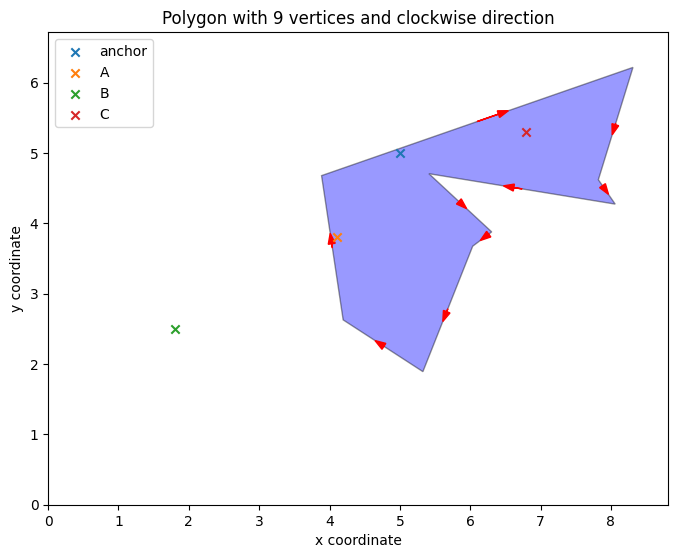

In [6]:
fig, ax = plt.subplots(figsize=(8,12))

# Create and add the polygon patch
polygon = Polygon(verticesE_irreg, closed=True, facecolor='blue', edgecolor='black', alpha=0.4)
ax.add_patch(polygon)

# Draw arrows along the edges to indicate orientation
for i in range(plgnE_irreg.n_vertices):
    vi = np.array(verticesE_irreg[i])
    vf = np.array(verticesE_irreg[(i + 1)])
    dx, dy = vf - vi
    # Scale the arrow a bit smaller than full edge
    ax.arrow((vi + vf)[0]/2., (vi + vf)[1]/2., dx * 0.1, dy * 0.1,
             head_width=0.1, length_includes_head=True, color='red')

# Set limits and aspect
ax.set_xlim(0, verticesE_irreg_x.max() + .5)
ax.set_ylim(0, verticesE_irreg_y.max() + .5)
ax.set_aspect('equal')

# plot the points to be checked
for p, name in zip(pointsE, namesE):
    plt.scatter(x=p[0], y= p[1], label = name, marker = 'x')

plt.title(f'Polygon with {plgnE_irreg.n_vertices} vertices and {plgnE_irreg.direction} direction')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()

# save the plot as PNG
plt.savefig('irreg_euclidean_polygon.png', dpi = 300)
plt.show()

In [7]:
print(plgnE_irreg.internal_point(pointsE, namesE))

+--------+------------+-----------+
| point  |   (x, y)   | is inside |
+--------+------------+-----------+
| anchor | (5.0, 5.0) |    True   |
|   A    | (4.1, 3.8) |    True   |
|   B    | (1.8, 2.5) |   False   |
|   C    | (6.8, 5.3) |    True   |
+--------+------------+-----------+


### 2.2 - Regular polygon

In [9]:
plgnE_reg = PolygonE()
plgnE_reg.create(**params_reg_E)

In [10]:
verticesE_reg_x = plgnE_reg.vertices_x
verticesE_reg_y = plgnE_reg.vertices_y

verticesE_reg = np.array([coord for coord in zip(verticesE_reg_x, verticesE_reg_y)])

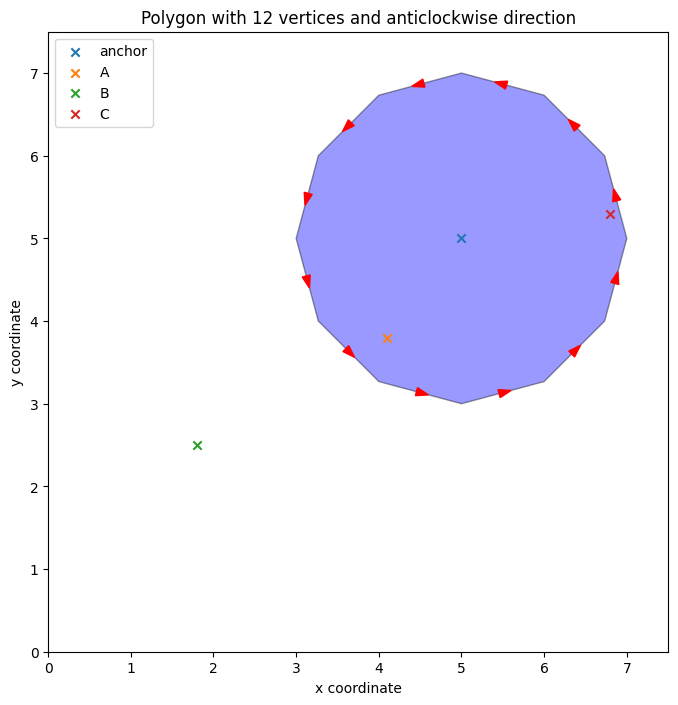

In [11]:
fig, ax = plt.subplots(figsize=(8,12))

# Create and add the polygon patch
polygon = Polygon(verticesE_reg, closed=True, facecolor='blue', edgecolor='black', alpha=0.4)
ax.add_patch(polygon)

# Draw arrows along the edges to indicate orientation
for i in range(plgnE_reg.n_vertices):
    vi = np.array(verticesE_reg[i])
    vf = np.array(verticesE_reg[(i + 1)])
    dx, dy = vf - vi
    # Scale the arrow a bit smaller than full edge
    ax.arrow((vi + vf)[0]/2., (vi + vf)[1]/2., dx * 0.1, dy * 0.1,
             head_width=0.1, length_includes_head=True, color='red')

# Set limits and aspect
ax.set_xlim(0, verticesE_reg_x.max() + .5)
ax.set_ylim(0, verticesE_reg_y.max() + .5)
ax.set_aspect('equal')

# plot the points to be checked
for p, name in zip(pointsE, namesE):
    plt.scatter(x=p[0], y= p[1], label = name, marker = 'x')

plt.title(f'Polygon with {plgnE_reg.n_vertices} vertices and {plgnE_reg.direction} direction')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()

# save the plot as PNG
plt.savefig('reg_euclidean_polygon.png', dpi = 300)
plt.show()

In [12]:
print(plgnE_reg.internal_point(pointsE, namesE))

+--------+------------+-----------+
| point  |   (x, y)   | is inside |
+--------+------------+-----------+
| anchor | (5.0, 5.0) |    True   |
|   A    | (4.1, 3.8) |    True   |
|   B    | (1.8, 2.5) |   False   |
|   C    | (6.8, 5.3) |    True   |
+--------+------------+-----------+


## 3 - Polygon on 2-sphere

In [13]:
params_irreg_S = {
    'anchor_point': (53., 13.),
    'n_vertices': 26,
    'angular_dist_min': 0.15,
    'angular_dist_max': 0.6,
    'angular_separation': 'random',
    'direction': 'clockwise'
}

params_reg_S = {
    'anchor_point': (53., 13.),
    'n_vertices': 12,
    'angular_dist_min': 0.45,
    'angular_dist_max': 0.45,
    'angular_separation': 'regular',
    'direction': 'anticlockwise'
}

### 3.1 - Irregular polygon

In [14]:
plgnS_irreg = PolygonS()
plgnS_irreg.create(**params_irreg_S)

In [15]:
verticesS_irreg_lat = plgnS_irreg.vertices_lat 
verticesS_irreg_lon = plgnS_irreg.vertices_lon

verticesS_irreg = np.array([coord for coord in zip(verticesS_irreg_lat, verticesS_irreg_lon)])

In [16]:
p_anchor = (53., 13.)
p_A = (53.05, 13.05)
p_B = (53.1, 12.3)
p_C = (53.2, 13.3)
p_D = (52.85, 12.85)

pointsS = [p_anchor, p_A, p_B, p_C, p_D]
namesS = ['anchor', 'A', 'B', 'C', 'D']

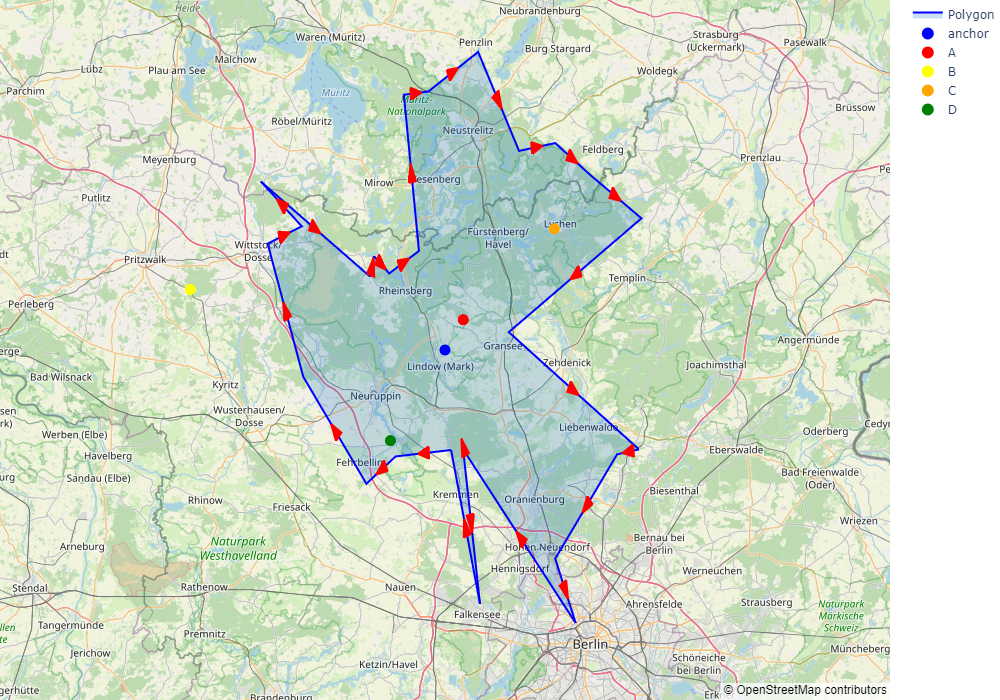

In [17]:
fig = go.Figure()

# Polygon fill
fig.add_trace(go.Scattermap(
    lat=verticesS_irreg_lat,
    lon=verticesS_irreg_lon,
    mode='lines',
    fill='toself',
    fillcolor='rgba(0, 100, 200, 0.2)',
    line=dict(width=2, color='blue'),
    name='Polygon'
))

size = 3.

length = 0.01*size  # the arrow length
widh =0.00333*size  #2*widh is the width of the arrow base as triangle

# create the arrowheads as polygons
for i in range(plgnS_irreg.n_vertices):  
    vi = np.array(verticesS_irreg[i])
    vf = np.array(verticesS_irreg[i + 1])
    w = (vf - vi)/np.linalg.norm(vf - vi)     
    u = np.array([-w[1], w[0]])  #u orthogonal on  w
         
    P = 0.5*(vi + vf)
    A = P - 0.5*length*w - widh*u
    B = P - 0.5*length*w + widh*u
    C = P + 0.5*length*w

    fig.add_trace(go.Scattermap(lat = [A[0], B[0], C[0], A[0]], 
                                lon =[A[1], B[1], C[1], A[1]], 
                                mode='lines', 
                                fill='toself', 
                                fillcolor='red', 
                                line_color='red',
                                showlegend=False
                               )
                 )

# plot the points to be checked
for p, name, color in zip(pointsS, namesS, ['blue', 'red', 'yellow', 'orange', 'green']):  
    fig.add_trace(go.Scattermap(lat = [p[0]], 
                                lon = [p[1]], 
                                mode='markers',
                                marker = dict(size = 12, color = color),
                                name = name
                               )
                 )
    
# Layout with OpenStreetMap
fig.update_layout(
    width=1000,  # width in pixels
    height=700,
    map_style='open-street-map',
    map_zoom=8,
    map_center={"lat": p_anchor[0], "lon": p_anchor[1]},
    margin={"r":0,"t":0,"l":0,"b":0}
)
# display the map as a static image
pio.renderers.default = "png"
fig.show()

In [18]:
print(plgnS_irreg.internal_point(pointsS, namesS))

+--------+----------------+-----------+
| point  |   (lat, lon)   | is inside |
+--------+----------------+-----------+
| anchor |  (53.0, 13.0)  |    True   |
|   A    | (53.05, 13.05) |    True   |
|   B    |  (53.1, 12.3)  |   False   |
|   C    |  (53.2, 13.3)  |    True   |
|   D    | (52.85, 12.85) |    True   |
+--------+----------------+-----------+


### 3.2 - Regular polygon

In [19]:
plgnS_reg = PolygonS()
plgnS_reg.create(**params_reg_S)

In [20]:
verticesS_reg_lat = plgnS_reg.vertices_lat
verticesS_reg_lon = plgnS_reg.vertices_lon

verticesS_reg = np.array([coord for coord in zip(verticesS_reg_lat, verticesS_reg_lon)])

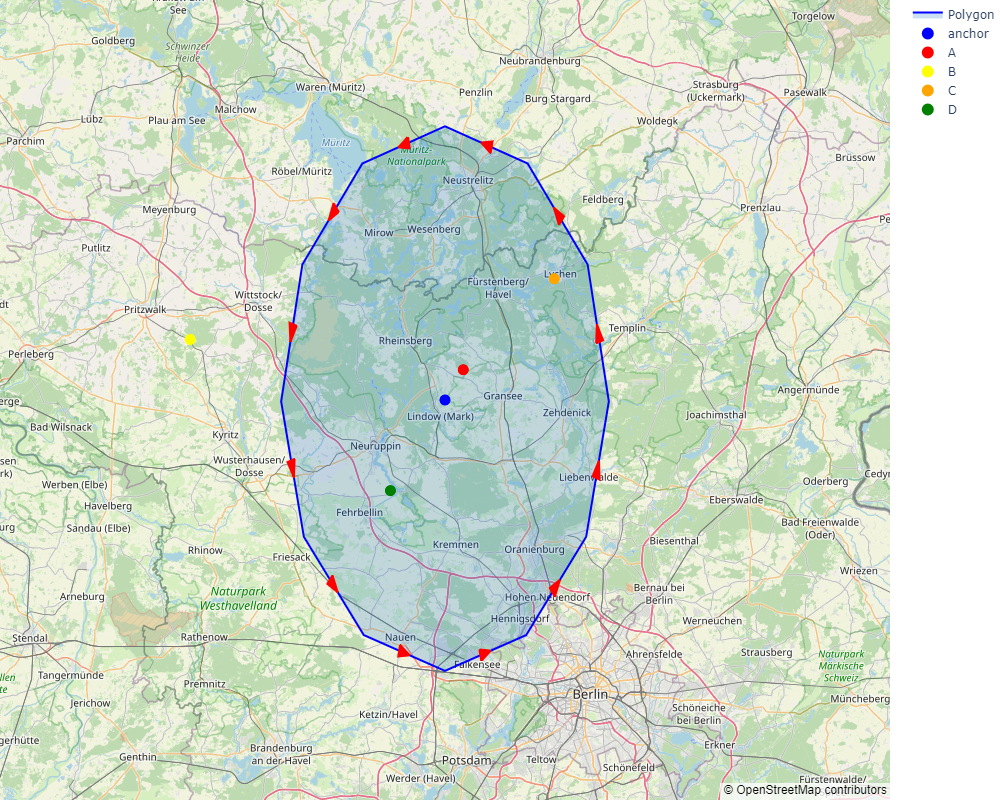

In [21]:
fig = go.Figure()

# Polygon fill
fig.add_trace(go.Scattermap(
    lat=verticesS_reg_lat,
    lon=verticesS_reg_lon,
    mode='lines',
    fill='toself',
    fillcolor='rgba(0, 100, 200, 0.2)',
    line=dict(width=2, color='blue'),
    name='Polygon'
))

size = 3.

length = 0.01*size  # the arrow length
widh =0.00333*size  #2*widh is the width of the arrow base as triangle

for i in range(plgnS_reg.n_vertices):  
    vi = np.array(verticesS_reg[i])
    vf = np.array(verticesS_reg[i + 1])
    w = (vf - vi)/np.linalg.norm(vf - vi)     
    u = np.array([-w[1], w[0]])  #u orthogonal on  w
         
    P = 0.5*(vi + vf)
    A = P - 0.5*length*w - widh*u
    B = P - 0.5*length*w + widh*u
    C = P + 0.5*length*w

    fig.add_trace(go.Scattermap(lat = [A[0], B[0], C[0], A[0]], 
                                lon =[A[1], B[1], C[1], A[1]], 
                                mode='lines', 
                                fill='toself', 
                                fillcolor='red', 
                                line_color='red',
                                showlegend=False
                               )
                 )

for p, name, color in zip(pointsS, namesS, ['blue', 'red', 'yellow', 'orange', 'green']):  

    fig.add_trace(go.Scattermap(lat = [p[0]], 
                                lon = [p[1]], 
                                mode='markers',
                                marker = dict(size = 12, color = color),
                                name = name
                               )
                 )
    
# Layout with OpenStreetMap
fig.update_layout(
    width=1000,  # width in pixels
    height=800,
    map_style='open-street-map',
    map_zoom=8,
    map_center={"lat": p_anchor[0], "lon": p_anchor[1]},
    margin={"r":0,"t":0,"l":0,"b":0}
)
pio.renderers.default = "png"
fig.show()

In [22]:
print(plgnS_reg.internal_point(pointsS, namesS))

+--------+----------------+-----------+
| point  |   (lat, lon)   | is inside |
+--------+----------------+-----------+
| anchor |  (53.0, 13.0)  |    True   |
|   A    | (53.05, 13.05) |    True   |
|   B    |  (53.1, 12.3)  |   False   |
|   C    |  (53.2, 13.3)  |    True   |
|   D    | (52.85, 12.85) |    True   |
+--------+----------------+-----------+
